## EDA on Bank Dataset

1 - age (numeric)
2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")
5 - default: has credit in default? (binary: "yes","no")
6 - balance: average yearly balance, in euros (numeric) 
7 - housing: has housing loan? (binary: "yes","no")
8 - loan: has personal loan? (binary: "yes","no")
   
   ** related with the last contact of the current campaign:**
   
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
10 - day: last contact day of the month (numeric)
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12 - duration: last contact duration, in seconds (numeric)
   
   **other attributes:**
   
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15 - previous: number of contacts performed before this campaign and for this client (numeric)
16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'F:\\Python Training\\Imarticus\\EDA'

In [3]:
df = pd.read_csv('bank/bank-full.csv', sep=';')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [69]:
df.y.value_counts(normalize=True)*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

In [7]:
cat_cols = df.select_dtypes(include='object').columns.to_list()

In [8]:
for col in cat_cols:
    print('Column: %s' % col)
    print(df[col].value_counts())
    print('\n\n')

Column: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64



Column: marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64



Column: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64



Column: default
no     44396
yes      815
Name: default, dtype: int64



Column: housing
yes    25130
no     20081
Name: housing, dtype: int64



Column: loan
no     37967
yes     7244
Name: loan, dtype: int64



Column: contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64



Column: month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar     

In [9]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [10]:
## Combining various job categories to few.
df['job'] = df['job'].replace({'admin.':'management','self-employed':'entrepreneur',\
                                  'blue-collar':'services','housemaid':'services',\
                                  'technician':'services','retired':'unemployed',\
                                  'student':'unemployed','unknown':'unemployed'})

In [11]:
df.job.value_counts()

services        22723
management      14629
unemployed       4793
entrepreneur     3066
Name: job, dtype: int64

In [12]:
df['poutcome'] = df['poutcome'].replace('unknown','other')

In [13]:
df.poutcome.value_counts()

other      38799
failure     4901
success     1511
Name: poutcome, dtype: int64

In [14]:
sorted(df.pdays.unique())

[-1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 12,
 13,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 1

In [15]:
p_days = df.pdays.value_counts()

In [16]:
p_days

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [17]:
df[df.pdays >= 181].count()

age          5059
job          5059
marital      5059
education    5059
default      5059
balance      5059
housing      5059
loan         5059
contact      5059
day          5059
month        5059
duration     5059
campaign     5059
pdays        5059
previous     5059
poutcome     5059
y            5059
dtype: int64

In [18]:
df['p_contact'] = pd.cut(df.pdays, bins=[-2,0, 30, 180, 872], labels=['no_contact','recent','inter','long'])

In [19]:
df.p_contact.value_counts()

no_contact    36954
long           5059
inter          3010
recent          188
Name: p_contact, dtype: int64

In [20]:
df.age.min(), df.age.max()

(18, 95)

In [21]:
df['agecat'] = pd.cut(df.age, bins=[17,30,45,60,96], labels=['young','middle','uppermiddle','old'])

In [22]:
df.agecat.value_counts()

middle         23733
uppermiddle    13260
young           7030
old             1188
Name: agecat, dtype: int64

In [23]:
df['marital'] = df['marital'].replace('divorced','single')

In [24]:
df.marital.value_counts()

married    27214
single     17997
Name: marital, dtype: int64

In [25]:
pd.crosstab(df.education, df.y)

y,no,yes
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


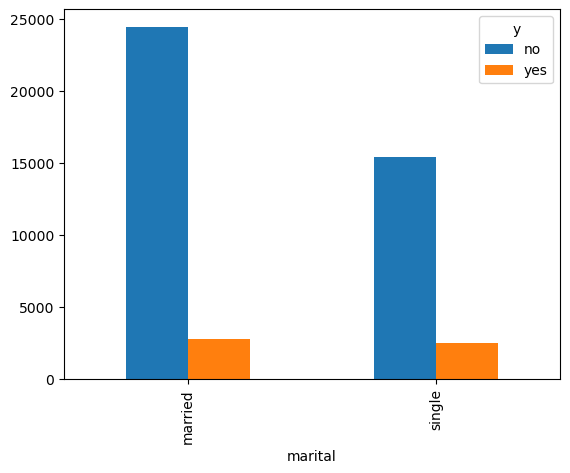

In [26]:
pd.crosstab(df.marital, df.y).plot(kind='bar')
plt.show()

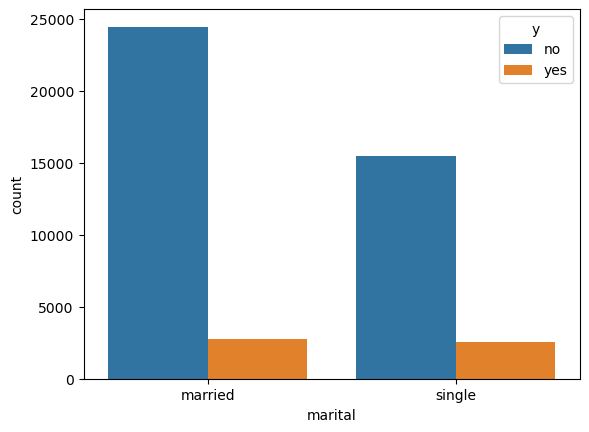

In [27]:
sns.countplot(x='marital', hue='y', data=df)
plt.show()

In [28]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [29]:
df['call_types'] = pd.cut(df.duration, bins=[-1,120,320,5000], labels=['short','medium','long'])

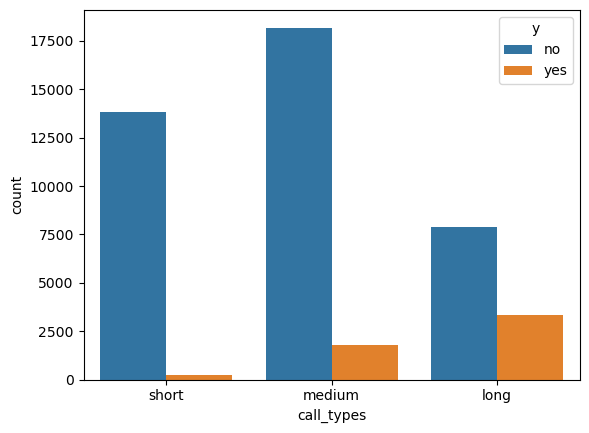

In [30]:
sns.countplot(x='call_types', hue='y', data=df)
plt.show()

In [31]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [32]:
df[df.balance < 0].shape, df[df.balance > 1500].shape

((3766, 20), (10895, 20))

In [33]:
df['balance_cat'] = pd.cut(df.balance, bins=[-9000,100,500,1500,(df.balance.max()+1)], labels=['low','medium','high','very_high'])

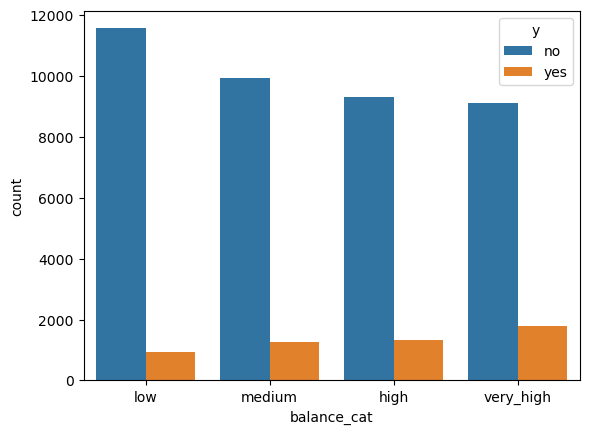

In [34]:
sns.countplot(x='balance_cat', hue='y', data=df)
plt.show()

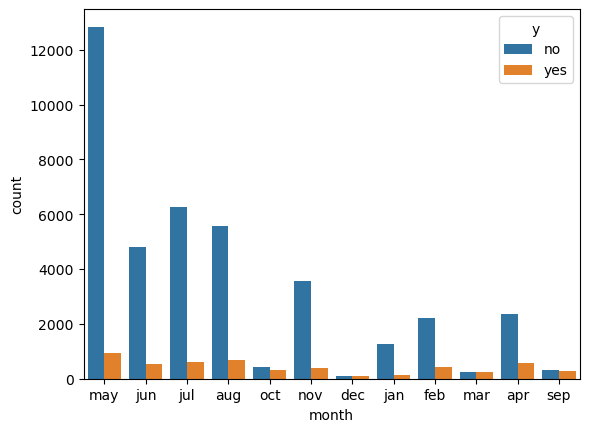

In [35]:
sns.countplot(x='month', hue='y', data=df)
plt.show()

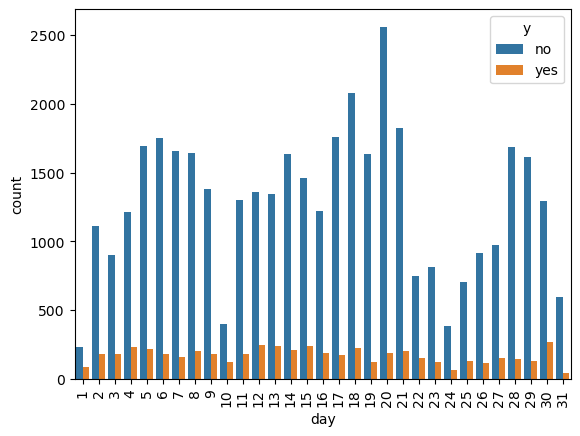

In [36]:
sns.countplot(x='day', hue='y', data=df)
plt.xticks(rotation=90)
plt.show()

In [37]:
## creating total of campaign contacts

In [38]:
df['total_contat'] = df['campaign'] + df['previous']

In [39]:
df.total_contat.describe()

count    45211.000000
mean         3.344164
std          3.799297
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max        277.000000
Name: total_contat, dtype: float64

In [40]:
df[df.total_contat >=10].shape

(2242, 22)

In [41]:
df['contact_cat'] = pd.cut(df.total_contat, bins=[0,2,10,300], labels=['low','medium','high'])

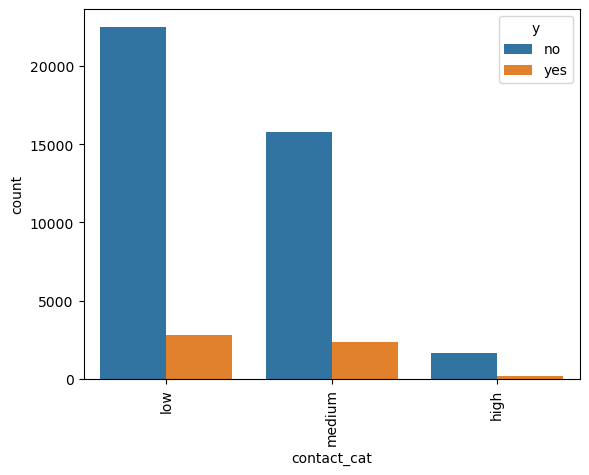

In [42]:
sns.countplot(x='contact_cat', hue='y', data=df)
plt.xticks(rotation=90)
plt.show()

In [43]:
df['day_cat']= pd.cut(df.day,bins=[0,7,15,21,32],labels=['first','second','third','fourth'])

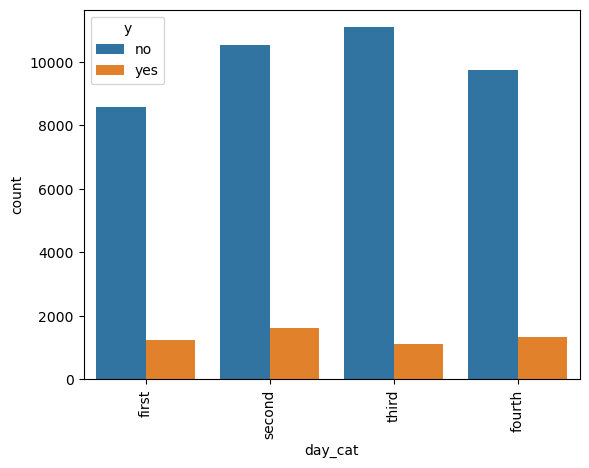

In [44]:
sns.countplot(x='day_cat', hue='y', data=df)
plt.xticks(rotation=90)
plt.show()

In [45]:
df['quarters'] = df.month.replace({'jan':'q1','feb':'q1','mar':'q1','apr':'q2','may':'q2',\
                                      'jun':'q2','jul':'q3','aug':'q3','sep':'q3','oct':'q4','nov':'q4','dec':'q4'})

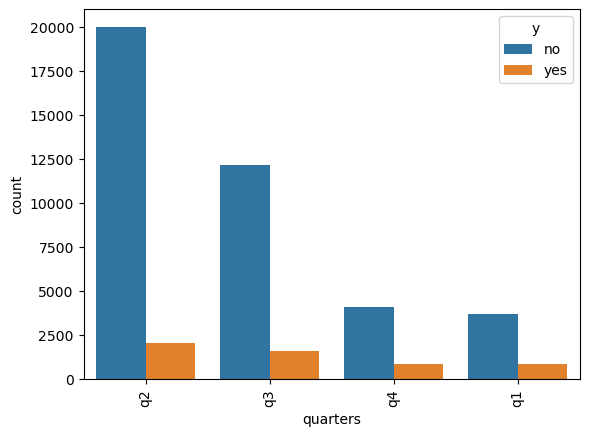

In [46]:
sns.countplot(x='quarters', hue='y', data=df)
plt.xticks(rotation=90)
plt.show()

In [98]:
df_new = df.drop(['age','pdays','duration','balance','day','campaign','previous','total_contat','month'], axis=1)

In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          45211 non-null  object  
 1   marital      45211 non-null  object  
 2   education    45211 non-null  object  
 3   default      45211 non-null  object  
 4   housing      45211 non-null  object  
 5   loan         45211 non-null  object  
 6   contact      45211 non-null  object  
 7   poutcome     45211 non-null  object  
 8   y            45211 non-null  object  
 9   p_contact    45211 non-null  category
 10  agecat       45211 non-null  category
 11  call_types   45211 non-null  category
 12  balance_cat  45211 non-null  category
 13  contact_cat  45211 non-null  category
 14  day_cat      45211 non-null  category
 15  quarters     45211 non-null  object  
dtypes: category(6), object(10)
memory usage: 3.7+ MB


## Oversampling under sample class

In [74]:
df_new.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [75]:
class_0, class_1 = df_new.y.value_counts()
print('(Class_0 : %d, Class_1: %d' % (class_0, class_1))

(Class_0 : 39922, Class_1: 5289


In [76]:
df_c0 = df_new[df_new.y == 'no']
df_c1 = df_new[df_new.y == 'yes']

In [77]:
df_c0.shape, df_c1.shape

((39922, 16), (5289, 16))

In [78]:
df_c1_over = df_c1.sample(class_0, replace=True)

In [79]:
df_c1_over.shape

(39922, 16)

In [80]:
df_new=pd.concat([df_c1_over, df_c0])
df_new.shape

(79844, 16)

## Over sampling using library

In [99]:
X = df_new.drop('y', axis=1)
y = df_new['y']

In [100]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)

X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({'no': 39922, 'yes': 5289})
Resample dataset shape Counter({'no': 39922, 'yes': 39922})


In [115]:
X_ros.shape

(79844, 15)

In [101]:
X = X_ros
y = y_ros

In [81]:
X = df_new.drop('y', axis=1)
y = df_new['y']

In [82]:
cat_features = X.columns.to_list()

In [83]:
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'p_contact',
 'agecat',
 'call_types',
 'balance_cat',
 'contact_cat',
 'day_cat',
 'quarters']

In [61]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [103]:
X_train.shape, X_test.shape

((63875, 15), (15969, 15))

In [104]:

clf = CatBoostClassifier(
    iterations=20
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features
)

Learning rate set to 0.5
0:	learn: 0.5753234	total: 31.2ms	remaining: 593ms
1:	learn: 0.5098543	total: 61.5ms	remaining: 553ms
2:	learn: 0.4856006	total: 94.4ms	remaining: 535ms
3:	learn: 0.4633807	total: 128ms	remaining: 512ms
4:	learn: 0.4544173	total: 158ms	remaining: 473ms
5:	learn: 0.4305583	total: 189ms	remaining: 441ms
6:	learn: 0.4224051	total: 223ms	remaining: 414ms
7:	learn: 0.4167004	total: 254ms	remaining: 381ms
8:	learn: 0.4135703	total: 286ms	remaining: 350ms
9:	learn: 0.4099870	total: 318ms	remaining: 318ms
10:	learn: 0.4048133	total: 350ms	remaining: 286ms
11:	learn: 0.4013743	total: 380ms	remaining: 253ms
12:	learn: 0.3991841	total: 413ms	remaining: 222ms
13:	learn: 0.3971788	total: 445ms	remaining: 191ms
14:	learn: 0.3959826	total: 478ms	remaining: 159ms
15:	learn: 0.3929936	total: 510ms	remaining: 128ms
16:	learn: 0.3915724	total: 541ms	remaining: 95.5ms
17:	learn: 0.3902524	total: 572ms	remaining: 63.5ms
18:	learn: 0.3897035	total: 602ms	remaining: 31.7ms
19:	learn:

In [105]:
y_pred = clf.predict(X_test)

In [106]:
round(accuracy_score(y_test, y_pred)*100,2)

81.88

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.87      0.75      0.80      7908
         yes       0.78      0.89      0.83      8061

    accuracy                           0.82     15969
   macro avg       0.83      0.82      0.82     15969
weighted avg       0.82      0.82      0.82     15969



In [108]:
confusion_matrix(y_test, y_pred)

array([[5912, 1996],
       [ 898, 7163]], dtype=int64)

In [109]:
df_new.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [116]:
X_ros.head()

,job,marital,education,default,housing,loan,contact,poutcome,p_contact,agecat,call_types,balance_cat,contact_cat,day_cat,quarters
0,management,married,tertiary,no,yes,no,unknown,other,no_contact,uppermiddle,medium,very_high,low,first,q2
1,services,single,secondary,no,yes,no,unknown,other,no_contact,middle,medium,low,low,first,q2
2,entrepreneur,married,secondary,no,yes,yes,unknown,other,no_contact,middle,short,low,low,first,q2
3,services,married,unknown,no,yes,no,unknown,other,no_contact,uppermiddle,short,very_high,low,first,q2
4,unemployed,single,unknown,no,no,no,unknown,other,no_contact,middle,medium,low,low,first,q2


In [117]:
df_new1 = X_ros.join(y_ros)

In [118]:
df_new1.head()

,job,marital,education,default,housing,loan,contact,poutcome,p_contact,agecat,call_types,balance_cat,contact_cat,day_cat,quarters,y
0,management,married,tertiary,no,yes,no,unknown,other,no_contact,uppermiddle,medium,very_high,low,first,q2,no
1,services,single,secondary,no,yes,no,unknown,other,no_contact,middle,medium,low,low,first,q2,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,other,no_contact,middle,short,low,low,first,q2,no
3,services,married,unknown,no,yes,no,unknown,other,no_contact,uppermiddle,short,very_high,low,first,q2,no
4,unemployed,single,unknown,no,no,no,unknown,other,no_contact,middle,medium,low,low,first,q2,no


In [119]:
df_yes = df_new1[df_new1.y == 'yes']

In [125]:
df_yes.shape

(39922, 16)

In [123]:
df_yes_wod = df_new1.drop_duplicates(keep='first')

In [124]:
df_yes_wod.shape

(29858, 16)